##### * Importing some useful libraries

In [1]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome 
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

* **Did some surfing and found some websites offering malicious links.** And found some datasets

* **Loading the main dataset.**

In [6]:
phish_data = pd.read_csv('phishing_site_urls.csv')

#### * You can download dataset from my **Kaggle** Profile <a href='https://www.kaggle.com/taruntiwarihp/phishing-site-urls'>here</a>

In [7]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [8]:
phish_data.tail()

,URL,Label
549340,23.227.196.215/,bad
549341,apple-checker.org/,bad
549342,apple-iclods.org/,bad
549343,apple-uptoday.org/,bad
549344,apple-search.info,bad


In [10]:
phish_data.isnull().sum() # there is no missing values

URL      0
Label    0
dtype: int64

* **Since it is classification problems so let's see the classes are balanced or imbalances**

In [11]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())

### Preprocessing

* **Now that we have the data, we have to vectorize our URLs. I used CountVectorizer and gather words using tokenizer, since there are words in urls that are more important than other words e.g ‘virus’, ‘.exe’ ,’.dat’ etc. Lets convert the URLs into a vector form.**

#### RegexpTokenizer
* A tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.

In [13]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [14]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [15]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0]) # using first row

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [16]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 2.540010800000001 sec


In [17]:
phish_data.sample(5)

,URL,Label,text_tokenized
235827,ronniemilsap.com/news/news/kfkf-fm-contest-win...,good,"[ronniemilsap, com, news, news, kfkf, fm, cont..."
382903,manta.com/c/mmczpfp/steve-lang-insurance-inc,good,"[manta, com, c, mmczpfp, steve, lang, insuranc..."
155435,ca.sports.yahoo.com/cfl/blog/cfl_experts/post/...,good,"[ca, sports, yahoo, com, cfl, blog, cfl, exper..."
194137,gogatehockey.blogspot.com/2011/01/2010-2011-se...,good,"[gogatehockey, blogspot, com, season, game, co..."
334965,fandango.com/rosemaryforsyth/filmography/p24372,good,"[fandango, com, rosemaryforsyth, filmography, p]"


#### SnowballStemmer
* Snowball is a small string processing language, gives root words

In [18]:
stemmer = SnowballStemmer("english") # choose a language

In [19]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 47.5948062 sec


In [20]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
504751,tdlqkewyjwakpru.ru/linuxsucks.php,bad,"[tdlqkewyjwakpru, ru, linuxsucks, php]","[tdlqkewyjwakpru, ru, linuxsuck, php]"
456326,usa-people-search.com/Find-Pat-Shaughnessy.aspx,good,"[usa, people, search, com, Find, Pat, Shaughne...","[usa, peopl, search, com, find, pat, shaughnes..."
301119,cduniverse.com/productinfo.asp?pid=1165964,good,"[cduniverse, com, productinfo, asp, pid]","[cdunivers, com, productinfo, asp, pid]"
545757,vanks.cl/2t3huwd,bad,"[vanks, cl, t, huwd]","[vank, cl, t, huwd]"
493632,www.peopleond-clan.de/u56gf2d/k76j5hg.exe,bad,"[www, peopleond, clan, de, u, gf, d, k, j, hg,...","[www, peopleond, clan, de, u, gf, d, k, j, hg,..."


In [21]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.34407540000000125 sec


In [22]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
119775,cemkece.tv/dovesheep/Auth/view/share/,bad,"[cemkece, tv, dovesheep, Auth, view, share]","[cemkec, tv, dovesheep, auth, view, share]",cemkec tv dovesheep auth view share
410740,ottawariver.org/html/ottawa/map_e.html,good,"[ottawariver, org, html, ottawa, map, e, html]","[ottawariv, org, html, ottawa, map, e, html]",ottawariv org html ottawa map e html
518241,okl.hohyzuketexppw.info/3e37qctaz7\nmonst.wall...,bad,"[okl, hohyzuketexppw, info, e, qctaz, nmonst, ...","[okl, hohyzuketexppw, info, e, qctaz, nmonst, ...",okl hohyzuketexppw info e qctaz nmonst wallpap...
395302,mylife.com/barbaragrahamlanger,good,"[mylife, com, barbaragrahamlanger]","[mylif, com, barbaragrahamlang]",mylif com barbaragrahamlang
113938,retipanzio.hu/kepek/ticket/cgi-index.php?email...,bad,"[retipanzio, hu, kepek, ticket, cgi, index, ph...","[retipanzio, hu, kepek, ticket, cgi, index, ph...",retipanzio hu kepek ticket cgi index php email...


### Creating Model

#### CountVectorizer
* CountVectorizer is used to transform a corpora of text to a vector of term / token counts.

In [37]:
#create cv object
cv = CountVectorizer()

In [38]:
#help(CountVectorizer())

In [39]:
feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed

In [40]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features
feature

<549345x350831 sparse matrix of type '<class 'numpy.int64'>'
	with 3676045 stored elements in Compressed Sparse Row format>

#### * Spliting the data 

In [41]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

In [42]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(trainX, trainY)

RandomForestClassifier(max_depth=5)

In [43]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(testX)
y_train_forest = forest.predict(trainX)

In [44]:
#computing the accuracy of the model performance
#importing packages
from sklearn.metrics import accuracy_score
acc_train_forest = accuracy_score(trainY,y_train_forest)
acc_test_forest = accuracy_score(testY,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.715
Random forest: Accuracy on test Data: 0.715


In [45]:
pickle.dump(forest,open('phishing1.pkl','wb'))

In [66]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), RandomForestClassifier(max_depth=21))
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray 

In [67]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [68]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=21))])

In [69]:
pipeline_ls.score(testX,testY) 

0.73074262580368

Training Accuracy : 0.730019805440671
Testing Accuracy : 0.73074262580368

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.05      1.00      0.10      2119
        Good       1.00      0.73      0.84    135218

    accuracy                           0.73    137337
   macro avg       0.53      0.86      0.47    137337
weighted avg       0.99      0.73      0.83    137337


CONFUSION MATRIX


<AxesSubplot:>

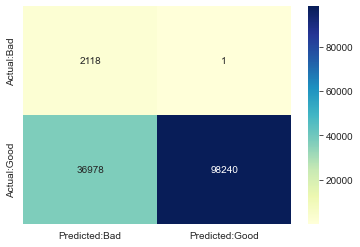

In [70]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")